In [11]:
# Import libraries
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc  # Garbage collector


import gc  # Garbage collector

warnings.filterwarnings('ignore')

In [2]:
train_raw = pd.read_feather('train_data.ftr')

In [3]:
train_raw.head(15)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-08-04,0.945801,0.001746,0.007866,1.004883,0.004219,0.110962,0.009857,0.009865,...,NaN,NaN,0.001925,0.008598,0.004528,NaN,0.000674,0.002222,0.002884,0
6,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-09-18,0.940918,0.002182,0.018860,1.007812,0.004509,0.103333,0.006603,0.000783,...,NaN,NaN,0.001336,0.004360,0.009384,NaN,0.007729,0.007660,0.002224,0
7,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-10-08,0.914551,0.003029,0.014328,1.000000,0.000263,0.108093,0.009529,0.007835,...,NaN,NaN,0.002398,0.008453,0.005554,NaN,0.001831,0.009613,0.007385,0
8,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-11-20,0.950684,0.009895,0.016891,1.003906,0.001789,0.102783,0.002520,0.009819,...,NaN,NaN,0.009743,0.003967,0.007942,NaN,0.008720,0.004368,0.000996,0
9,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-12-04,0.868652,0.001082,0.001930,1.007812,0.001772,0.100464,0.004627,0.006073,...,NaN,NaN,0.003611,0.009605,0.007267,NaN,0.008766,0.004753,0.009071,0


In [4]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 191 entries, customer_ID to target
dtypes: category(11), datetime64[ns](1), float16(177), int64(1), object(1)
memory usage: 2.0+ GB


In [5]:
train_raw.shape

(5531451, 191)

In [6]:
# Number of unique customers in the dataset
train_raw["customer_ID"].nunique()

458913

In [7]:
# Date range
train_raw["S_2"].min(), train_raw["S_2"].max()

(Timestamp('2017-03-01 00:00:00'), Timestamp('2018-03-31 00:00:00'))

In [8]:
print("No. of features for each category:")
for pref in ["D_", "S_", "P_", "B_", "R_"]:
    print(f"{pref} : {len([i for i in train_raw.columns if i.startswith(pref)])}")

No. of features for each category:
D_ : 96
S_ : 22
P_ : 3
B_ : 40
R_ : 28


In [9]:
# Target values distribution
train_raw["target"].value_counts("%")

target
0    0.750903
1    0.249097
Name: proportion, dtype: float64

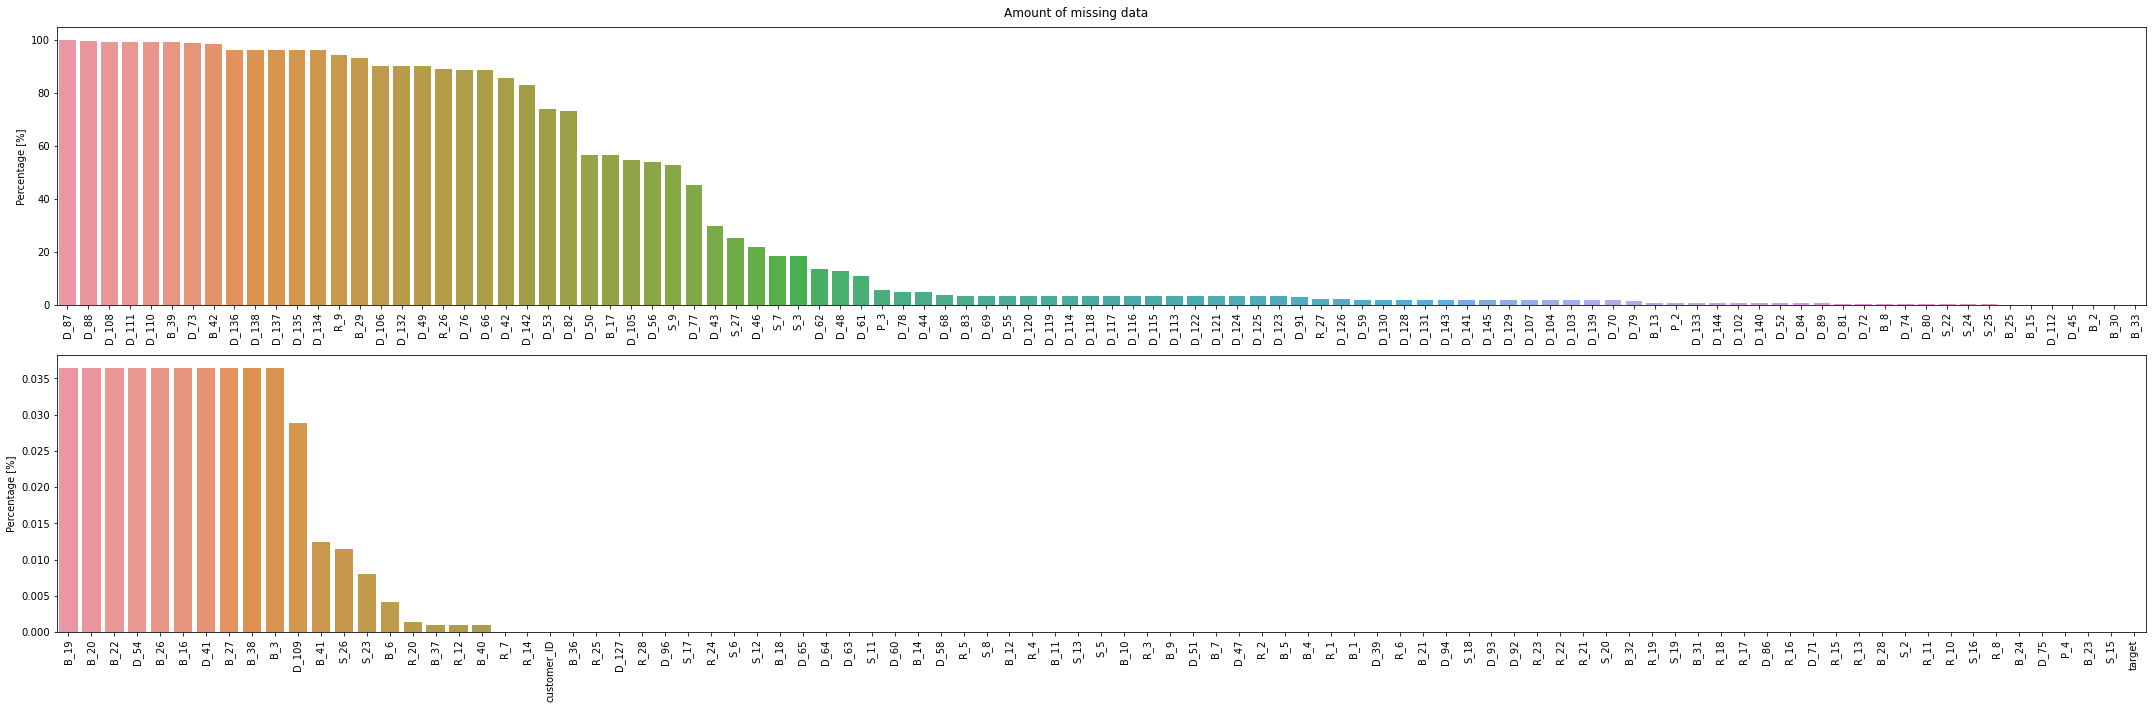

In [12]:
# Missing values
tmp = train_raw.isna().sum().mul(100).div(len(train_raw)).sort_values(ascending=False)

fig, ax = plt.subplots(2,1, figsize=(30,10))
sns.barplot(x=tmp[:100].index, y=tmp[:100].values, ax=ax[0])
sns.barplot(x=tmp[100:].index, y=tmp[100:].values, ax=ax[1])
ax[0].set_ylabel("Percentage [%]"), ax[1].set_ylabel("Percentage [%]")
ax[0].tick_params(axis='x', rotation=90); ax[1].tick_params(axis='x', rotation=90)
plt.suptitle("Amount of missing data")
plt.tight_layout()
plt.show()

In [13]:
missingDF = pd.DataFrame(tmp).reset_index()
missingDF[missingDF[0]>90]

,index,0
0,D_87,99.930127
1,D_88,99.891457
2,D_108,99.476846
3,D_111,99.433530
4,D_110,99.433530
5,B_39,99.391986
6,D_73,98.990211
7,B_42,98.707789
8,D_136,96.480146
9,D_138,96.480146


In [14]:
# columns with no missing values
len(missingDF[missingDF[0]==0])

70

In [15]:
# only 3 columns in payment(P_) category, checking missing data in them
train_raw[[i for i in train_raw.columns if i.startswith("P_")]].isna().sum().div(len(train_raw)).mul(100)

P_2    0.831337
P_3    5.450505
P_4    0.000000
dtype: float64

## Data Exploration for Two Customers with different "target" values(risk scores) 

In [34]:
# target_1_customers = train_raw[train_raw['target'] == 1]
train_raw.iloc[104].customer_ID

'0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85'

In [35]:
filtered_customer_data =train_raw[train_raw["customer_ID"].isin(['0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a', '0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85'])]

In [36]:
filtered_customer_data.head(1)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,0.00597,0.004345,0.001534,0.002426,0.003706,0.003819,0.000569,0.00061,0.002674,0


In [37]:

filtered_customer_data.tail(1)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
116,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2018-03-01,0.424561,0.53125,0.979492,0.029297,0.008499,0.152588,0.005344,1.15625,...,0.00663,0.009834,0.003794,1.000977,0.007061,0.875977,1.004883,0.003349,0.734375,1


In [38]:
filtered_customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 116
Columns: 166 entries, customer_ID to target
dtypes: category(10), datetime64[ns](1), float16(153), int64(1), object(1)
memory usage: 10.9+ KB


In [39]:
filtered_customer_data.describe()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
count,26,26.000000,26.000000,26.000000,26.000000,26.000000,17.000000,26.000000,26.000000,4.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2017-09-12 14:46:09.230769152,0.669922,0.067749,0.475342,0.515137,0.005379,0.124084,0.005470,0.587891,0.046448,...,0.005802,0.004650,0.004784,0.503418,0.004646,0.437988,0.503906,0.005169,0.372314,0.500000
min,2017-03-09 00:00:00,0.391602,0.000269,0.001930,0.020950,0.000214,0.098877,0.000685,0.000783,0.028671,...,0.000715,0.000122,0.000139,0.000427,0.000091,0.000427,0.000569,0.000610,0.000996,0.000000
25%,2017-06-13 06:00:00,0.408203,0.002432,0.013847,0.025505,0.002127,0.103333,0.002602,0.007245,0.031586,...,0.004416,0.001003,0.002695,0.003355,0.003129,0.005045,0.006249,0.002978,0.006618,0.000000
50%,2017-09-16 00:00:00,0.646606,0.009506,0.467041,0.514648,0.005995,0.117310,0.005434,0.582520,0.045227,...,0.005678,0.005098,0.004612,0.504883,0.004408,0.437012,0.504883,0.005205,0.368652,0.500000
75%,2017-12-13 18:00:00,0.938232,0.037773,0.935059,1.004883,0.008207,0.135010,0.008066,1.172119,0.060059,...,0.007849,0.007323,0.007257,1.002930,0.006532,0.870850,1.002930,0.007627,0.732056,1.000000
max,2018-03-13 00:00:00,0.960449,0.647461,0.982422,1.009766,0.009972,0.168335,0.009888,1.177734,0.066711,...,0.009979,0.009834,0.009125,1.009766,0.009605,0.875977,1.006836,0.009613,0.824707,1.000000
std,NaN,0.269287,0.157349,0.472656,0.499512,0.003239,0.022995,0.002970,0.592773,0.018707,...,0.002630,0.003258,0.002619,0.509766,0.002514,0.441406,0.508789,0.002878,0.374268,0.509902


In [40]:
filtered_customer_data.isna().sum().mul(100).div(len(train_raw)).sort_values(ascending=False)[:5]

D_77    0.000434
D_43    0.000398
D_56    0.000235
D_50    0.000235
B_17    0.000235
dtype: float64

In [41]:
# excluding categorical and date features
plot_cols = [i for i in filtered_customer_data.columns if i not in ["target","customer_ID","S_2",'B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']]

In [42]:
len(plot_cols)

153

## How each feature varies with time for both target values

<Figure size 432x288 with 0 Axes>

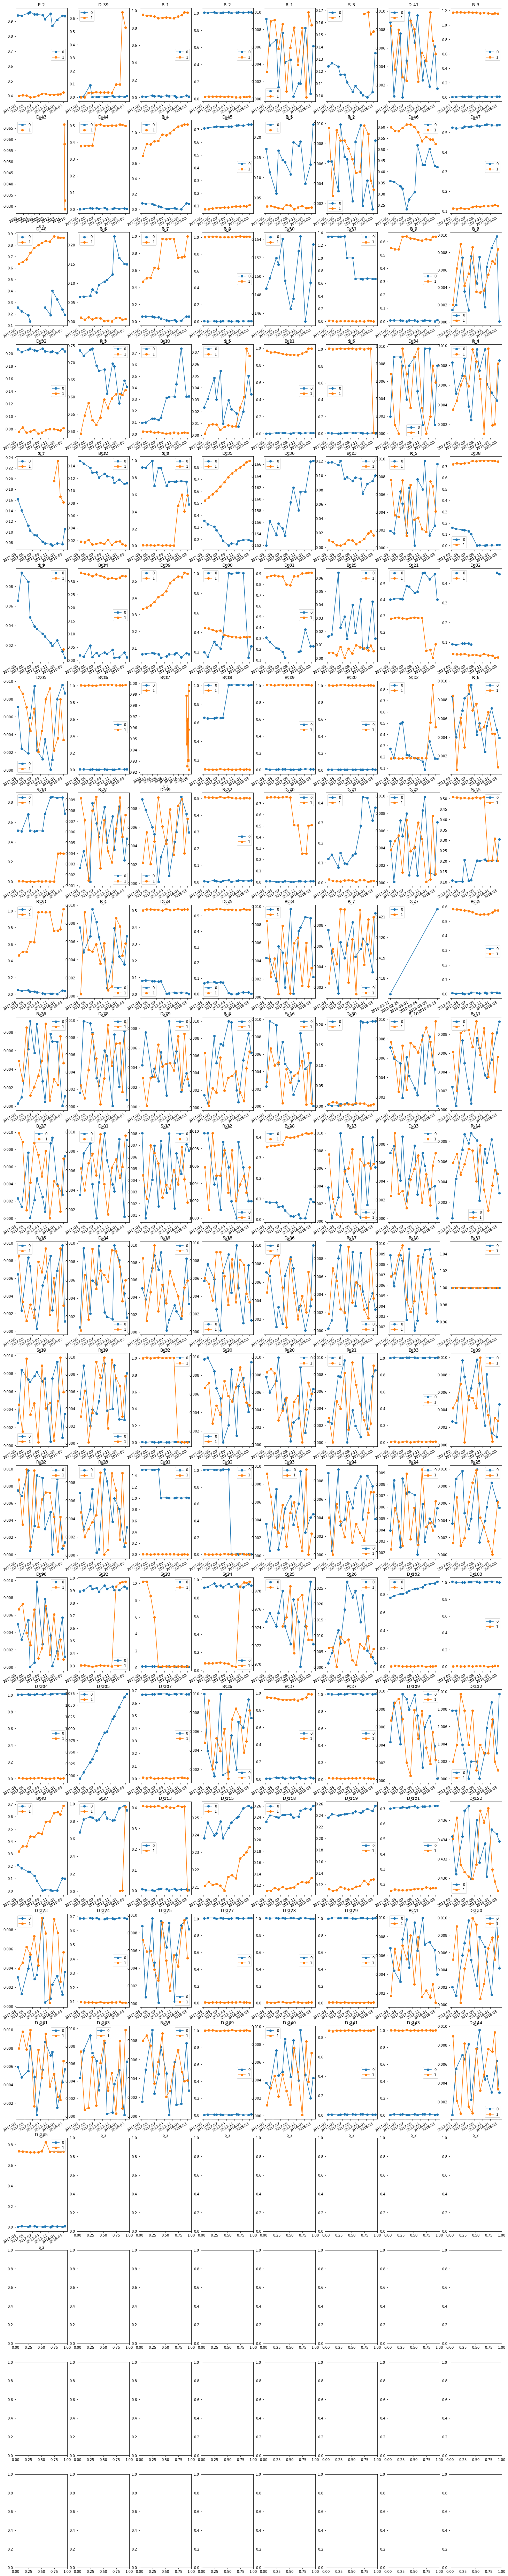

In [43]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig, axs = plt.subplots(23,8,figsize=(25, 150))
for i,ax in zip(plot_cols[:],axs.ravel()):
    filtered_customer_data.groupby("customer_ID").plot(x="S_2", y=i, marker="o", ax=ax)
    ax.legend(["0","1"])
    ax.set_title(i)

# Handling Missing Data

In [27]:
# dropping columns with missing values >70%
missingDF = pd.DataFrame(tmp).reset_index()
drop_cols = missingDF[missingDF[0]>70]["index"].values
print(drop_cols)

['D_87' 'D_88' 'D_108' 'D_111' 'D_110' 'B_39' 'D_73' 'B_42' 'D_136'
 'D_138' 'D_137' 'D_135' 'D_134' 'R_9' 'B_29' 'D_106' 'D_132' 'D_49'
 'R_26' 'D_76' 'D_66' 'D_42' 'D_142' 'D_53' 'D_82']


In [28]:
train_raw.drop(columns = drop_cols,axis=1, inplace=True)

In [29]:
train_raw

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,0.005970,0.004345,0.001534,0.002426,0.003706,0.003819,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,0.004837,0.007496,0.004932,0.003956,0.003166,0.005032,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,0.005497,0.009224,0.009125,0.003269,0.007328,0.000427,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,0.008263,0.007206,0.002409,0.006119,0.004517,0.003201,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,0.004848,0.006313,0.004463,0.003672,0.004944,0.008888,0.001670,0.008125,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979492,0.416016,0.020813,0.828125,0.003487,0.090759,0.005341,0.025146,...,0.004509,0.000776,0.007069,0.006836,0.003679,0.000457,0.000906,0.001497,0.002775,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984863,0.296631,0.007210,0.812500,0.005905,0.079895,0.002243,0.023697,...,0.003407,0.001741,0.002056,0.003309,0.007095,0.007858,0.002777,0.008224,0.008858,0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.982910,0.444092,0.013153,0.815430,0.003456,0.100525,0.002111,0.012344,...,0.002947,0.006062,0.005077,0.009956,0.009995,0.001088,0.005692,0.006775,0.005566,0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969727,0.442627,0.009857,1.003906,0.005116,0.101807,0.009933,0.008575,...,0.008514,0.003811,0.008682,0.005543,0.006565,0.009880,0.008125,0.001168,0.003983,0


In [30]:
# For categorical columns
cols = train_raw.columns
num_cols = train_raw._get_numeric_data().columns

categorical_columns = list(set(cols) - set(num_cols))
filtered_categorical_columns = list(set(train_raw[categorical_columns])-{"S_2","customer_ID"})

In [31]:
train_raw[filtered_categorical_columns].nunique()

D_117    7
D_68     7
D_116    2
D_120    2
B_30     3
D_114    2
D_126    3
D_63     6
B_38     7
D_64     5
dtype: int64

In [44]:
train_raw[filtered_categorical_columns].isna().sum().mul(100).div(len(train_raw))

D_117    3.194749
D_68     3.914036
D_116    3.194749
D_120    3.194749
B_30     0.036446
D_114    3.194749
D_126    2.111851
D_63     0.000000
B_38     0.036446
D_64     0.000000
dtype: float64

In [45]:
for i in filtered_categorical_columns:
    print(train_raw[i].value_counts())

D_117
-1.0    1456084
3.0     1166400
4.0     1138666
2.0      666808
5.0      459290
6.0      344520
1.0      122967
Name: count, dtype: int64
D_68
6.0    2782455
5.0    1201706
3.0     484442
4.0     477187
2.0     220111
1.0     133122
0.0      15925
Name: count, dtype: int64
D_116
0.0    5348109
1.0       6626
Name: count, dtype: int64
D_120
0.0    4729723
1.0     625012
Name: count, dtype: int64
B_30
0.0    4710663
1.0     763955
2.0      54817
Name: count, dtype: int64
D_114
1.0    3316478
0.0    2038257
Name: count, dtype: int64
D_126
1.0     4262414
0.0      891323
-1.0     260898
Name: count, dtype: int64
D_63
CO    4119621
CR     930133
CL     438390
XZ      25786
XM      10556
XL       6965
Name: count, dtype: int64
B_38
2.0    1953232
3.0    1255315
1.0    1160047
5.0     444856
4.0     294917
7.0     259028
6.0     162040
Name: count, dtype: int64
D_64
O     2913244
U     1523448
R      840112
       217442
-1      37205
Name: count, dtype: int64


In [46]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="most_frequent")
transformed_df = pd.DataFrame(imputer.fit_transform(train_raw[filtered_categorical_columns]),columns = filtered_categorical_columns)

In [47]:
train_raw[filtered_categorical_columns] = transformed_df[filtered_categorical_columns]

In [48]:
# For numeric columns
numeric_columns = train_raw.select_dtypes(np.number).columns
train_raw[numeric_columns] = train_raw[numeric_columns].fillna(train_raw[numeric_columns].mean())

In [69]:
numeric_columns

Index(['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_43',
       'D_44',
       ...
       'D_131', 'D_133', 'R_28', 'D_139', 'D_140', 'D_141', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=154)

In [50]:
train_raw.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,0.005970,0.004345,0.001534,0.002426,0.003706,0.003819,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,0.004837,0.007496,0.004932,0.003956,0.003166,0.005032,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,0.005497,0.009224,0.009125,0.003269,0.007328,0.000427,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,0.008263,0.007206,0.002409,0.006119,0.004517,0.003201,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,0.004848,0.006313,0.004463,0.003672,0.004944,0.008888,0.001670,0.008125,0.009827,0


In [51]:
# Handling date column

train_raw["S_2_day"] = train_raw["S_2"].dt.day
train_raw["S_2_month"] = train_raw["S_2"].dt.month
train_raw["S_2_year"] = train_raw["S_2"].dt.year

In [52]:
# considering only one data point per customer (latest one) as time series is not being used
train_raw = train_raw.groupby(['customer_ID']).nth(-1).reset_index(drop=True)

In [53]:
# drop S_2
train_raw.drop(columns=["S_2"], axis=1, inplace=True)

In [54]:
train_raw.shape

(458913, 168)

In [86]:
# converting pandas "categorical" dtype to numeric
cols = ["D_68", "B_30", "B_38", "D_114", "D_116", "D_117", "D_120", "D_126"]
train_raw[cols] = train_raw[cols].apply(pd.to_numeric, errors='coerce')

In [62]:
train_raw

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,...,D_139,D_140,D_141,D_143,D_144,D_145,target,S_2_day,S_2_month,S_2_year
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,NaN,...,0.007187,0.004234,0.005085,0.005810,0.002970,0.008530,0,13,3,2018
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,0.060638,...,0.002981,0.007481,0.007874,0.003284,0.003170,0.008514,0,25,3,2018
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,NaN,...,0.007381,0.006622,0.000965,0.002201,0.000834,0.003445,0,12,3,2018
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,0.046112,...,0.002705,0.006184,0.001899,0.008186,0.005558,0.002983,0,29,3,2018
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,0.044678,...,0.002974,0.004162,0.005764,0.008156,0.006943,0.000905,0,30,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0.844238,0.447510,0.028519,1.009766,0.001928,0.128662,0.003483,0.005894,0.113037,...,0.007919,0.001519,0.005531,0.001431,0.003010,0.004845,0,31,3,2018
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.831055,0.033661,0.292480,0.055664,0.006954,NaN,0.005791,0.233032,0.134521,...,0.004395,0.006184,0.001479,0.004795,0.009232,0.006435,0,22,3,2018
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0.800293,0.267090,0.020569,1.006836,0.000957,0.066650,0.007423,0.006313,0.049774,...,0.006035,0.002869,0.002150,0.008034,0.000340,0.002148,0,7,3,2018
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0.753906,0.008621,0.015839,0.714355,0.000993,0.408936,0.003391,0.050049,0.046112,...,1.009766,0.004478,0.949707,1.009766,0.002502,0.185547,1,23,3,2018


# Modelling

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier
import xgboost as xgb
from datetime import datetime, timedelta
from utils import amex_metric_official

In [57]:
def amex_metric_official(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()

    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
       
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

In [70]:
X = train_raw.drop(columns=["target","customer_ID"],axis=1)
y = train_raw["target"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=100)

In [73]:
# label encoding
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ["D_63","D_64"]

oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-999)
oe.fit(X_train[categorical_columns])

X_train_enc = oe.transform(X_train[categorical_columns])
X_test_enc = oe.transform(X_test[categorical_columns])

X_train[categorical_columns] = X_train_enc
X_test[categorical_columns] = X_test_enc

In [74]:
X_train.to_csv("x_train.csv", index=False)
X_test.to_csv("x_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [76]:
xgb_classifier = XGBClassifier(objective='binary:logistic', 
                      n_estimators=200,
                      eta=0.2,
                      seed=12,
                      learning_rate=0.02,
                      use_label_encoder=False,
                      eval_metric='aucpr',                      
                    #  early_stopping_rounds=10,
                  #     tree_method='gpu_hist',
                      enable_categorical=False
                            )
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric='aucpr',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [77]:
y_pred = xgb_classifier.predict(X_test)

In [78]:
y_pred_prob = xgb_classifier.predict_proba(X_test)[:,1]

In [79]:
y_test = pd.DataFrame(y_test, columns=["target"])
y_pred = pd.DataFrame(y_pred, columns=["prediction"])
y_pred_prob = pd.DataFrame(y_pred_prob, columns=["prediction"])

In [80]:
amex_metric_official(y_test, y_pred_prob)

0.0027893283989062732

In [81]:
# Compute accuracy
accuracy = metrics.accuracy_score(y_test["target"], y_pred["prediction"])
print(f'accuracy: {accuracy: .2%}')

accuracy:  89.36%


In [82]:
import joblib
joblib.dump(xgb_classifier, "xgb_classifier_v1.h5")

['xgb_classifier_v1.h5']

In [83]:
import joblib
joblib.dump(oe, "oe.h5")

['oe.h5']